<a href="https://colab.research.google.com/github/Harshithakapa1010/UMBC_690_FALL2024_/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 10 - Mini Project

Comparing the economy and wealth of G7 countries and BRICS countries.

Use http://g7brics.streamlit.app as the reference.

Make sure your check your calculation, aggregation, and visualization with the reference site for correctness.

For visualization, pay attention to details - color, label, information display.

## Step 1 - Import Python libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Step 2 - Load the input dataset

Download the individaul countries data from the reference site and upload it to your GitHub folder. Load the dataset directly from your GitHub.

In [3]:

# Load the dataset
url = "https://raw.githubusercontent.com/Harshithakapa1010/UMBC_690_FALL2024_/refs/heads/main/2024-11-07T00-25_export%20(3).csv"
df = pd.read_csv(url)


## Step 3 - Explore the input dataset

- Display number of rows and columns
- Dispaly at first 5 rows, last 5 rows, and random 5 rows.
- Display information about the dataset
- For all numerical variables, display their summary statistics
- For all categorical variables, display their number of categories and most frequent category
- Find out how many countries each region has.
- Display all countries that are Latin American & Caribbean.
- Find out how many countries each income level has.
- Display all countries that are of high income.


In [4]:
# Display the number of rows and columns
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")


The dataset has 5208 rows and 17 columns.


In [5]:
# Display the first 5 rows
print("\nFirst 5 rows:\n", df.head())



First 5 rows:
    Unnamed: 0  Year Country Code Country Name                      Region  \
0           0  2000          ABW        Aruba  Latin America & Caribbean    
1           1  2000          AFG  Afghanistan                  South Asia   
2           2  2000          AGO       Angola         Sub-Saharan Africa    
3           3  2000          ALB      Albania       Europe & Central Asia   
4           4  2000          AND      Andorra       Europe & Central Asia   

          Income Group    Lending Type  Military Expenditure ($Millions)  \
0          High income  Not classified                               NaN   
1           Low income             IDA                               NaN   
2  Lower middle income            IBRD                        583.621334   
3  Upper middle income            IBRD                         45.362503   
4          High income  Not classified                               NaN   

   Military Expenditure (% of GDP)  GDP ($Billions)  GDP PPP ($B

In [6]:
# Display the last 5 rows
print("\nLast 5 rows:\n", df.tail())



Last 5 rows:
       Unnamed: 0  Year Country Code  Country Name                      Region  \
5203        5203  2023          XKX        Kosovo       Europe & Central Asia   
5204        5204  2023          YEM   Yemen, Rep.  Middle East & North Africa   
5205        5205  2023          ZAF  South Africa         Sub-Saharan Africa    
5206        5206  2023          ZMB        Zambia         Sub-Saharan Africa    
5207        5207  2023          ZWE      Zimbabwe         Sub-Saharan Africa    

             Income Group Lending Type  Military Expenditure ($Millions)  \
5203  Upper middle income          IDA                               NaN   
5204           Low income          IDA                               NaN   
5205  Upper middle income         IBRD                               NaN   
5206  Lower middle income          IDA                               NaN   
5207  Lower middle income        Blend                               NaN   

      Military Expenditure (% of GDP)  GD

In [7]:
# Display 5 random rows
print("\nRandom 5 rows:\n", df.sample(5))


Random 5 rows:
       Unnamed: 0  Year Country Code        Country Name  \
2695        2695  2012          IRN  Iran, Islamic Rep.   
141          141  2000          NER               Niger   
3273        3273  2015          BGR            Bulgaria   
427          427  2001          VUT             Vanuatu   
1824        1824  2008          IMN         Isle of Man   

                          Region         Income Group    Lending Type  \
2695  Middle East & North Africa  Upper middle income            IBRD   
141          Sub-Saharan Africa            Low income             IDA   
3273       Europe & Central Asia          High income            IBRD   
427          East Asia & Pacific  Lower middle income             IDA   
1824       Europe & Central Asia          High income  Not classified   

      Military Expenditure ($Millions)  Military Expenditure (% of GDP)  \
2695                      16493.963287                         2.686608   
141                          20.084947 

In [8]:
# Display dataset information
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                5208 non-null   int64  
 1   Year                                      5208 non-null   int64  
 2   Country Code                              5208 non-null   object 
 3   Country Name                              5208 non-null   object 
 4   Region                                    5208 non-null   object 
 5   Income Group                              5208 non-null   object 
 6   Lending Type                              5208 non-null   object 
 7   Military Expenditure ($Millions)          3553 non-null   float64
 8   Military Expenditure (% of GDP)           3428 non-null   float64
 9   GDP ($Billions)                           4988 non-null   float64
 10  GDP PPP ($Bill

In [9]:
print("\nSummary Statistics for Numerical Variables:")
print(df.describe())


Summary Statistics for Numerical Variables:
        Unnamed: 0         Year  Military Expenditure ($Millions)  \
count  5208.000000  5208.000000                       3553.000000   
mean   2603.500000  2011.500000                       9692.743472   
std    1503.564432     6.922851                      53776.761846   
min       0.000000  2000.000000                          0.000000   
25%    1301.750000  2005.750000                        107.553688   
50%    2603.500000  2011.500000                        569.671622   
75%    3905.250000  2017.250000                       3625.564802   
max    5207.000000  2023.000000                     876943.200000   

       Military Expenditure (% of GDP)  GDP ($Billions)  GDP PPP ($Billions)  \
count                      3428.000000      4988.000000          4726.000000   
mean                          1.966078       325.507413           509.041065   
std                           1.772127      1491.780379          1940.946622   
min          

In [10]:


# 2. Categorical variables: number of categories and most frequent category
print("\nCategorical Variables Summary:")
categorical_vars = df.select_dtypes(include=['object', 'category'])
for col in categorical_vars.columns:
    print(f"{col}:")
    print(f"  - Number of categories: {categorical_vars[col].nunique()}")
    print(f"  - Most frequent category: {categorical_vars[col].mode()[0]}")




Categorical Variables Summary:
Country Code:
  - Number of categories: 217
  - Most frequent category: ABW
Country Name:
  - Number of categories: 217
  - Most frequent category: Afghanistan
Region:
  - Number of categories: 7
  - Most frequent category: Europe & Central Asia
Income Group:
  - Number of categories: 5
  - Most frequent category: High income
Lending Type:
  - Number of categories: 4
  - Most frequent category: Not classified
Group:
  - Number of categories: 3
  - Most frequent category: REST OF WORLD


In [11]:

print("\nNumber of countries per region:")
print(df['Region'].value_counts())





Number of countries per region:
Region
Europe & Central Asia         1392
Sub-Saharan Africa            1152
Latin America & Caribbean     1008
East Asia & Pacific            888
Middle East & North Africa     504
South Asia                     192
North America                   72
Name: count, dtype: int64


In [12]:

print("\nCountries in Latin America & Caribbean:")
latin_american_countries = df[df['Region'] == 'Latin America & Caribbean']['Country Name']
print(latin_american_countries.to_list())




Countries in Latin America & Caribbean:
[]


In [13]:


print("\nNumber of Countries per Income Level:")
income_level_counts = df['Income Group'].value_counts()
print(income_level_counts)


Number of Countries per Income Level:
Income Group
High income            2040
Upper middle income    1296
Lower middle income    1224
Low income              624
Not classified           24
Name: count, dtype: int64


In [14]:
print("\nCountries in High Income Group:")
print(df[df['Income Group'] == 'High income']['Country Name'].unique())



Countries in High Income Group:
['Aruba' 'Andorra' 'United Arab Emirates' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Belgium' 'Bulgaria'
 'Bahrain' 'Bahamas, The' 'Bermuda' 'Barbados' 'Brunei Darussalam'
 'Canada' 'Switzerland' 'Channel Islands' 'Chile' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'Faroe Islands' 'United Kingdom' 'Gibraltar' 'Greece'
 'Greenland' 'Guam' 'Guyana' 'Hong Kong SAR, China' 'Croatia' 'Hungary'
 'Isle of Man' 'Ireland' 'Iceland' 'Israel' 'Italy' 'Japan'
 'St. Kitts and Nevis' 'Korea, Rep.' 'Kuwait' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Latvia' 'Macao SAR, China' 'St. Martin (French part)'
 'Monaco' 'Malta' 'Northern Mariana Islands' 'New Caledonia' 'Netherlands'
 'Norway' 'Nauru' 'New Zealand' 'Oman' 'Panama' 'Palau' 'Poland'
 'Puerto Rico' 'Portugal' 'French Polynesia' 'Qatar' 'Romania'
 'Russian Federation' 'Saudi Arabia' 'Singapore' 'San Marino'
 'Slovak Republic' 'Sloven

## Step 4 - Categorize Each Country

Create a new column "Group". If a country is one of the seven G7 countried, the value of "Group" would be "G7", if a country of one of the five BRICS countries, the value of "Group" would be "BRICS". Otherwise, the value of "Group" would be "REST of WORLD".

In [15]:
# Define G7 and BRICS countries
G7_countries = ["United States", "Canada", "United Kingdom", "Germany", "France", "Italy", "Japan"]
BRICS_countries = ["Brazil", "Russia", "India", "China", "South Africa"]

# Function to assign a group based on the country
def assign_group(country):
    if country in G7_countries:
        return "G7"
    elif country in BRICS_countries:
        return "BRICS"
    else:
        return "REST of WORLD"

# Apply the function to create the "Group" column
df['Group'] = df['Country Name'].apply(assign_group)

# Display the updated dataset with 'Group' column
print("Updated Dataset with 'Group' Column:")
print(df[['Country Name', 'Group']].head())



Updated Dataset with 'Group' Column:
  Country Name          Group
0        Aruba  REST of WORLD
1  Afghanistan  REST of WORLD
2       Angola  REST of WORLD
3      Albania  REST of WORLD
4      Andorra  REST of WORLD


## Step 5 - Aggregate Data

Aggregate the following columns at the "Group" level for each year:

- For GDP, using "sum" for aggregation.
- For GDP Per Capita, use "mean" for aggregation.
- Check your calculation with the reference site.

In [16]:
# Step 5: Aggregate the data by 'Year' and 'Group'
df_groupby_group = df.groupby(['Year', 'Group']).agg({
    'GDP ($Billions)': 'sum',  # Sum GDP by Group and Year
    'GDP Per Capita ($)': 'mean'  # Mean GDP per capita by Group and Year
}).reset_index()

# Display the aggregated data
print("\nAggregated Data:")
print(df_groupby_group.head())




Aggregated Data:
   Year          Group  GDP ($Billions)  GDP Per Capita ($)
0  2000          BRICS      2486.928163         2092.467207
1  2000             G7     22089.917915        27757.147971
2  2000  REST of WORLD      8901.873408         7547.718130
3  2001          BRICS      2520.254577         1878.182566
4  2001             G7     21836.921489        27121.012840


## Step 6 - Calculate Percentage Share of GDP

For each year, calculate the percentage share of each group's GDP. Check your calculation with the reference site.

In [17]:
# Step 6: Calculate the total GDP for each year (across all groups)
total_gdp_per_year = df_groupby_group.groupby('Year')['GDP ($Billions)'].transform('sum')

# Step 6: Calculate the percentage share of each group's GDP
df_groupby_group['GDP Percentage Share'] = (df_groupby_group['GDP ($Billions)'] / total_gdp_per_year) * 100

# Display the updated data with the percentage share
print("\nData with GDP Percentage Share:")
print(df_groupby_group[['Year', 'Group', 'GDP ($Billions)', 'GDP Percentage Share']].head())




Data with GDP Percentage Share:
   Year          Group  GDP ($Billions)  GDP Percentage Share
0  2000          BRICS      2486.928163              7.428385
1  2000             G7     22089.917915             65.981968
2  2000  REST of WORLD      8901.873408             26.589647
3  2001          BRICS      2520.254577              7.568731
4  2001             G7     21836.921489             65.579800


## Step 7 - Plot the GDP Percentage Share Over Time

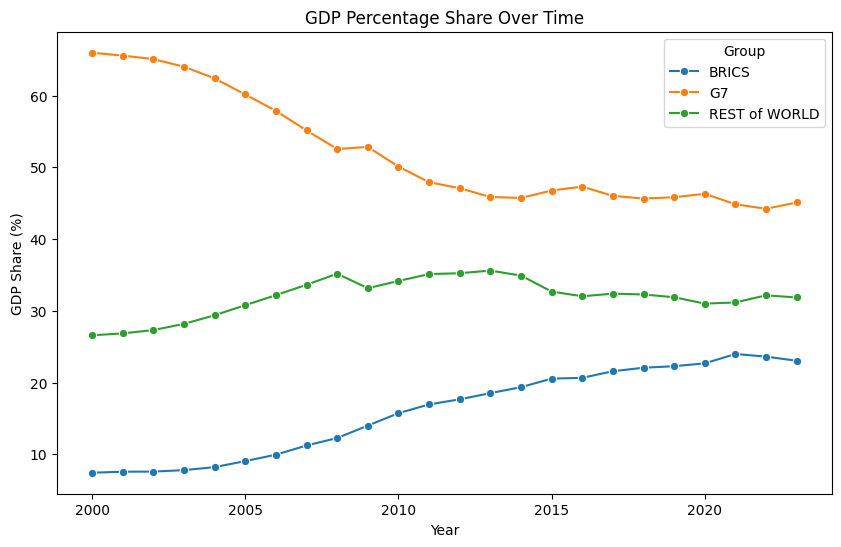

In [18]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_groupby_group, x='Year', y='GDP Percentage Share', hue='Group', marker='o')
plt.title('GDP Percentage Share Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Share (%)')
plt.legend(title='Group')
plt.show()


## Step 8 - Plot the Total GDP Over Time

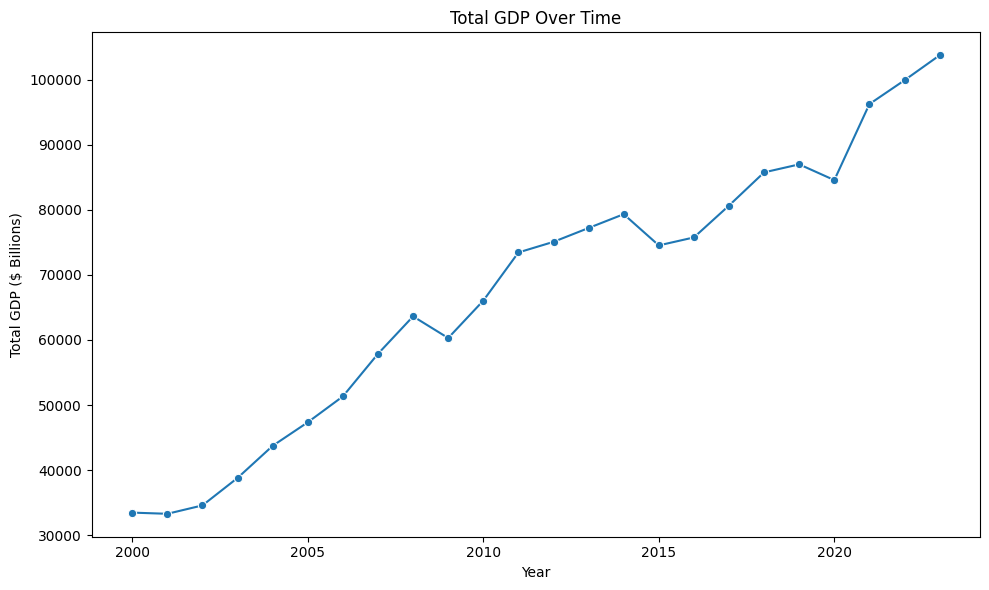

In [19]:

total_gdp_over_time = df_groupby_group.groupby('Year')['GDP ($Billions)'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_gdp_over_time, x='Year', y='GDP ($Billions)', marker='o')
plt.title('Total GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Total GDP ($ Billions)')
plt.tight_layout()
plt.show()


## Step 9 - Plot the 2023 GDP Pie Chart

Each group is a slice of a pie. Make sure the following information is displayed for each slice:

- Group Name
- GDP Percentage Share
- GDP Total

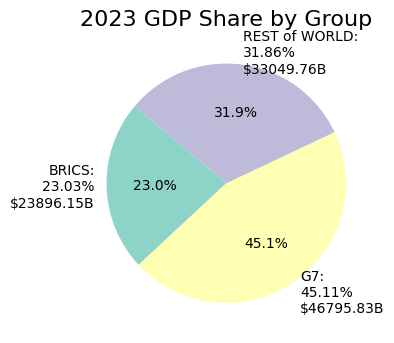

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_groupby_group is already created and contains aggregated data with 'Group' and 'GDP' columns.

# Filter data for the year 2023
gdp_2023 = df_groupby_group[df_groupby_group['Year'] == 2023].copy()

# Calculate the total GDP for 2023
total_gdp_2023 = gdp_2023['GDP ($Billions)'].sum()

# Calculate the GDP Percentage Share for each group
gdp_2023['GDP Percentage Share (%)'] = (gdp_2023['GDP ($Billions)'] / total_gdp_2023) * 100

# Create the labels for each slice
gdp_2023['Label'] = gdp_2023.apply(
    lambda row: f"{row['Group']}:\n{row['GDP Percentage Share (%)']:.2f}%\n${row['GDP ($Billions)']:.2f}B", axis=1
)

# Pie chart values and labels
gdp_values_2023 = gdp_2023['GDP ($Billions)']
labels_2023 = gdp_2023['Label']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    gdp_values_2023,
    labels=labels_2023,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3", len(gdp_values_2023))
)

# Title and display the chart
plt.title('2023 GDP Share by Group', fontsize=16)
plt.tight_layout()
plt.show()


## Step 10 - Plot the 2023 GDP Pie Charts

One pie chart for G7 and one pie chart for BRICK. Each country is a slice of a pie. Make sure the following information is displayed for each slice:

- Country Name
- GDP Percentage Share
- GDP Total

In [21]:

g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
df_2023 = df[df['Year'] == 2023].dropna(subset=['GDP ($Billions)', 'Country Name'])
df_2023['Group'] = df_2023['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

g7 = df_2023[df_2023['Group'] == 'G7'].copy()
brics = df_2023[df_2023['Group'] == 'BRICS'].copy()

g7.loc[:, 'GDP Percentage Share'] = g7['GDP ($Billions)'] / g7['GDP ($Billions)'].sum() * 100
brics.loc[:, 'GDP Percentage Share'] = brics['GDP ($Billions)'] / brics['GDP ($Billions)'].sum() * 100

fig_g7 = px.pie(g7, names='Country Name', values='GDP ($Billions)', hover_data=['GDP Percentage Share'], title='G7 GDP Share in 2023')
fig_brics = px.pie(brics, names='Country Name', values='GDP ($Billions)', hover_data=['GDP Percentage Share'], title='BRICS GDP Share in 2023')

fig_g7.show()
fig_brics.show()


## Step 11 - Plot the 2023 GDP Sun Burst Chart

Showing the hierarchy of Group and Country.

In [22]:


gdp_2023_groups = df[(df['Year'] == 2023) & (df['Group'].isin(['G7', 'BRICS']))]

gdp_2023_groups = gdp_2023_groups[['Group', 'Country Name', 'GDP ($Billions)']]

fig = px.sunburst(
    gdp_2023_groups,
    path=['Group', 'Country Name'],
    values='GDP ($Billions)',
    title="2023 GDP Sunburst Chart by Group and Country"
)

fig.show()

## Step 12 - Plot the 2023 GDP Tree Map Chart

Showing the hierarchy of Group and Country.

In [23]:
# Filter data for 2023 and add 'Group' column
df_2023 = df[df['Year'] == 2023].dropna(subset=['GDP ($Billions)', 'Country Name'])
df_2023['Group'] = df_2023['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

# Prepare data for Treemap
treemap_data = df_2023[['Group', 'Country Name', 'GDP ($Billions)']]

# Plot Tree Map Chart
fig = px.treemap(treemap_data,
                 path=['Group', 'Country Name'],  # Define hierarchy (Group -> Country)
                 values='GDP ($Billions)',  # Size of each block
                 title="2023 GDP Tree Map Chart by Group and Country")

# Show the chart
fig.show()

## Step 13 - Plot the Historic Trend of GDP Per Capita

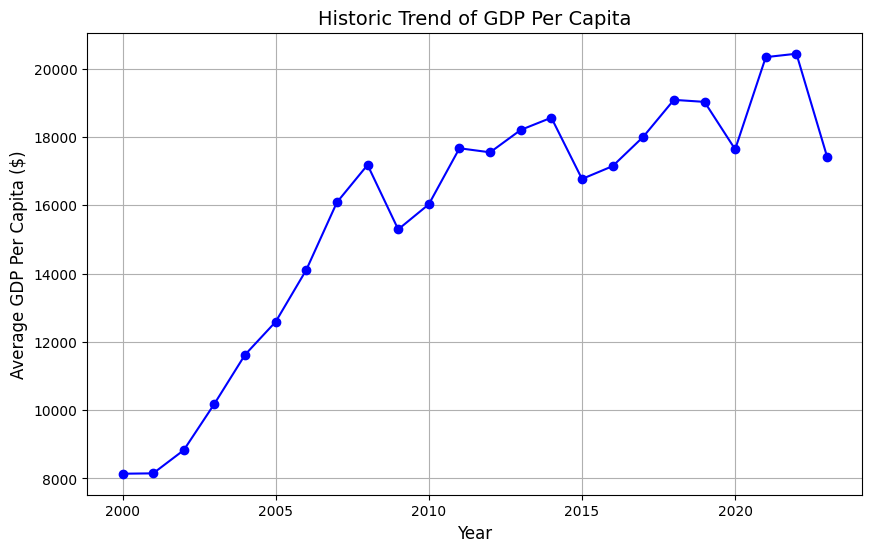

In [24]:
import matplotlib.pyplot as plt

# Group the data by 'Year' and calculate the average GDP per capita
gdp_per_capita_trend = df.groupby('Year')['GDP Per Capita ($)'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(gdp_per_capita_trend['Year'], gdp_per_capita_trend['GDP Per Capita ($)'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title("Historic Trend of GDP Per Capita", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average GDP Per Capita ($)", fontsize=12)

# Enable grid
plt.grid(True)

# Show the plot
plt.show()


## Step 14 - Plot the 2023 GDP Per Capita Bar Chart

Each group is a bar.

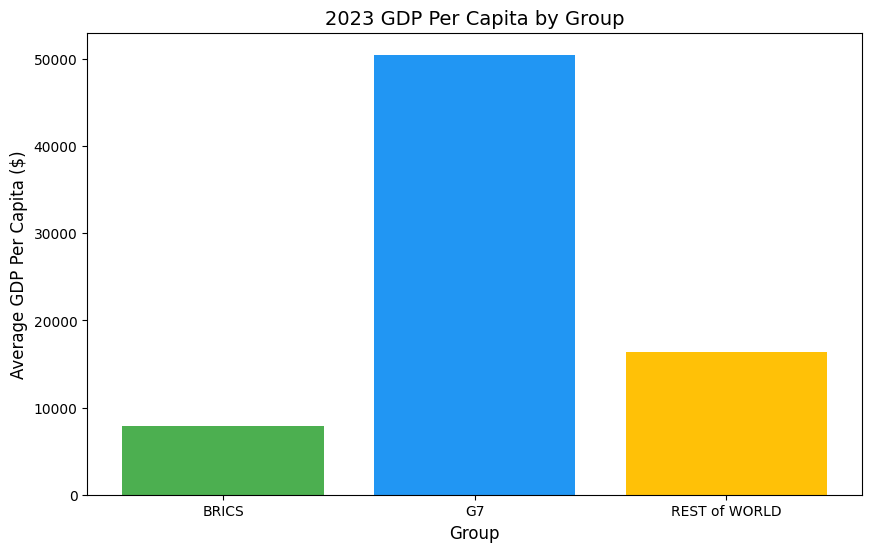

In [25]:


# Filter data for the year 2023
df_2023 = df[df['Year'] == 2023]

# Group by 'Group' and calculate the mean GDP Per Capita for each group
gdp_per_capita_2023 = df_2023.groupby('Group')['GDP Per Capita ($)'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(gdp_per_capita_2023['Group'], gdp_per_capita_2023['GDP Per Capita ($)'], color=['#4CAF50', '#2196F3', '#FFC107'])

# Add title and labels
plt.title('2023 GDP Per Capita by Group', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Average GDP Per Capita ($)', fontsize=12)

# Show the plot
plt.show()


## Step 15 - Plot the 2023 GDP Per Capita Bar Chart of G7 and BRICS countries

Each country is a bar. Differentiate group by color.

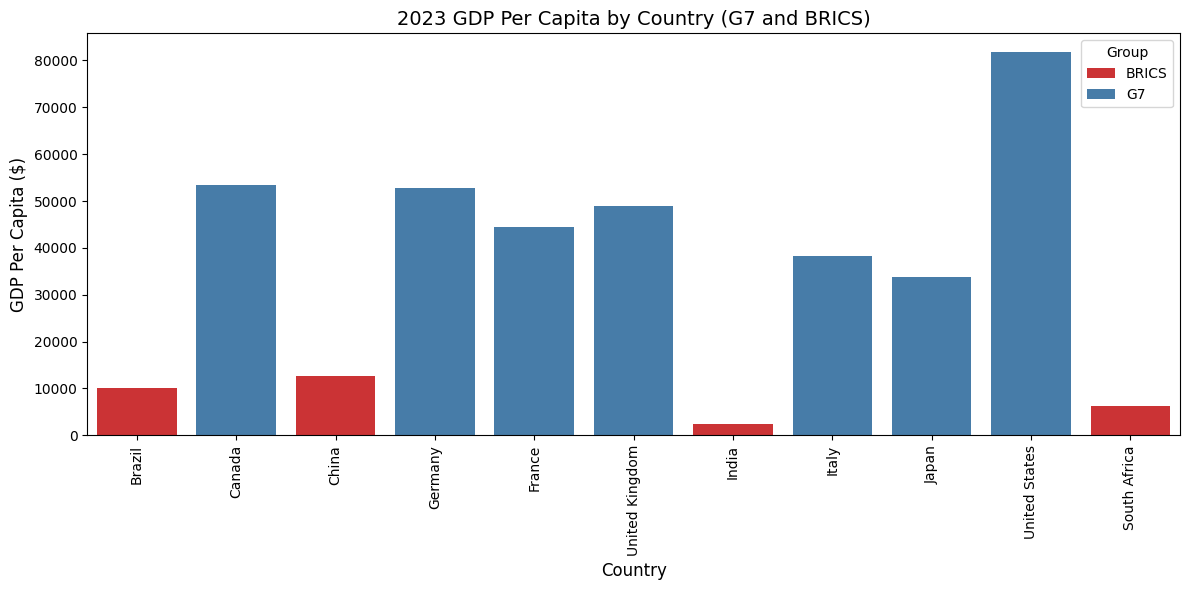

In [26]:


# Filter data for 2023 and select G7 and BRICS countries
df_2023_g7_brics = df_2023[df_2023['Group'].isin(['G7', 'BRICS'])]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_2023_g7_brics, x='Country Name', y='GDP Per Capita ($)', hue='Group', palette='Set1')

# Add title and labels
plt.title('2023 GDP Per Capita by Country (G7 and BRICS)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP Per Capita ($)', fontsize=12)
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.legend(title='Group')

# Show the plot
plt.tight_layout()
plt.show()


## Step 16 - Create a Choropleth

To show G7 countries and BRICS countries and use color code to differentiate the two broups.

In [29]:

fig = px.choropleth(df[df['Group'].isin(['G7', 'BRICS'])], locations="Country Name", color="Group",
                    locationmode="country names", title="G7 and BRICS Countries Choropleth",
                    color_discrete_map={"G7": "blue", "BRICS": "red"})
fig.show()
